#*Modelo predictivo de Churn*#

#Introducción:#
El desgaste del cliente (también conocido como abandono de clientes) es uno de los mayores gastos de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a elaborar estrategias para sus múltiples iniciativas de retención.

Nuestra investigación esta dirigida a los departamentos estratégicos de la organización encargados de la fidelización de clientes y que buscan deben investigar los motivos de deserción, segmentarlos y formular estrategias para la retención.

#Objetivo:#

El objetivo es hacer uso de un conjunto de datos de transacciones de clientes de Kaggle para comprender los pasos clave involucrados en la predicción del desgaste del cliente en Python.


#Preguntas Orientadoras#


1.  ¿Cuál es la probabilidad de que un cliente activo abandone una organización?
2.  ¿Cuáles son los indicadores clave de una rotación de clientes?
3.  ¿Qué estrategias de retención se pueden implementar en función de los resultados para disminuir la rotación de clientes potenciales? 


 

#Contexto Analitico#

Tenemos un set de datos csv con la informmación de transaccion de clientes bajado de Kaggle. En este archivo tenemos las bajas de clientes de un banco que trabaja en europa, la idea es identificar en donde se generá el churn y poder predecir cuales son los factores que determinan que el cliente va a abandonar.

#Detalle de Variables

#Importación de librerías a utilizar#

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carga de set de datos#

El set de datos se obtiene de Kaggle. Se encuentra disponible en:

https://www.kaggle.com/datasets/halimedogan/churn-dataset?resource=download

In [4]:
dataset = pd.read_csv("/content/churn2.csv")

#Data Wrangling

#Exploración de datos

El set de datos churn2 contiene 10.000 registros de clientes de un banco. Los siguiguientes son los campos que tiene el dataset y su descripción. 

1. **CustomerId:** Identificación de cada cliente en el dataset
2. **Surname:** Apellido del cliente.
3. **CreditScore:**  Contiene valores aleatorios 
4. **Geography:** La ubicación de un cliente 
5. **Gender:** Genero del cliente.
6. **Age:** Edad del cliente
7. **Tenure:** se refiere al número de años que el cliente ha sido cliente del banco. 
8. **Balance:** Saldo disponible de los clientes.
9. **NumOfProducts:** Refiere a la cantidad de productos que un cliente ha comprado a través del banco.
10. **HasCrCard:** Indica si un cliente tiene o no una tarjeta de crédito.
11. **IsActiveMember:** Indica si el cliente es un miembro activo del banco.
12. **EstimatedSalary:** Salario del cliente.
13. **Exited:** Indica si el cliente abandonó o no del banco.

A continuación se ilustra la parte superior del dataset.

In [5]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Para una mayor eficiencia del análisis, verificamos que el dataset no contiene datos nulos

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


De igual manera, hacemos un mapeo de los registro duplicados, conservando el primero.

In [7]:
dataset.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

Dato que los campos "CreditScore" (número aletaorio) y "RowNumber" no aportan información relevante para el analísis, eliminamos estos campos.

In [8]:
dataset.drop(['CreditScore'],axis=1,inplace=True)
dataset.drop(['RowNumber'],axis=1,inplace=True)


Vamos a modiicar los valores de la variable Genero para dejarla con valores numericos. Reemplazando el femenino por 0 y masculino por 1.

In [9]:
dataset['Gender'] = dataset['Gender'].map({'Female': 0, 
                                 'Male': 1, })
dataset

,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,Germany,1,42,3,75075.31,2,1,0,92888.52,1


Un método de descripción rápida nos permite determinar que la edad media de los clientes es aproximadamente 39 años (son relativamente jovenes). En promedio, los tienen más de un producto.

In [10]:
dataset.describe()

,CustomerId,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dado que la variable que más importa en el modelo es el abandono, contamos las cantidades de abandono que tenemos en nuestro dataset.
El resultado indica que 7963 (79.63%) de los clientes no abandonan el banco y por lo tanto, la tasa de abandono es del 20.37%

In [11]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Produndizando en el análisis, validamos la cantidad de abandono por las variables categoricas.

In [12]:
dataset.groupby(["Geography","Age","Gender"]).Exited.sum().unstack()

Gender           0    1
Geography Age          
France    18   0.0  1.0
          19   0.0  0.0
          20   0.0  0.0
          21   0.0  1.0
          22   1.0  5.0
...            ...  ...
Spain     77   NaN  0.0
          78   0.0  0.0
          79   0.0  NaN
          80   NaN  0.0
          88   NaN  0.0

[196 rows x 2 columns]

#EDA

In [13]:
dataset["Gender"].unique()


array([0, 1])

In [14]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
dataset["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [16]:
dataset["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

Verificamos la distribucion del abandono (churn) en el set de datos, el conjunto de datos está desequilibrado con una alta proporción de clientes activos en comparación con sus contrapartes rotas.

In [17]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Limpiamos el dataset:

In [18]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [19]:
dataset = dataset.sort_values(['Geography', 'Age','Tenure'])


Como los  algoritmos de ML generalmente solo pueden tener valores numéricos como sus variables independientes entendemos que la codificación de etiquetas es bastante fundamental, ya que codifican etiquetas categóricas con valores numéricos apropiados. 

Utilizamos un codigo encontrado en internet que nos permite codificar todas las variables categóricas que tienen solo dos valores únicos. Cualquier variable categórica que tenga más de dos valores únicos se trata con la codificación de etiquetas y la codificación en caliente en las secciones siguientes.

In [20]:

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


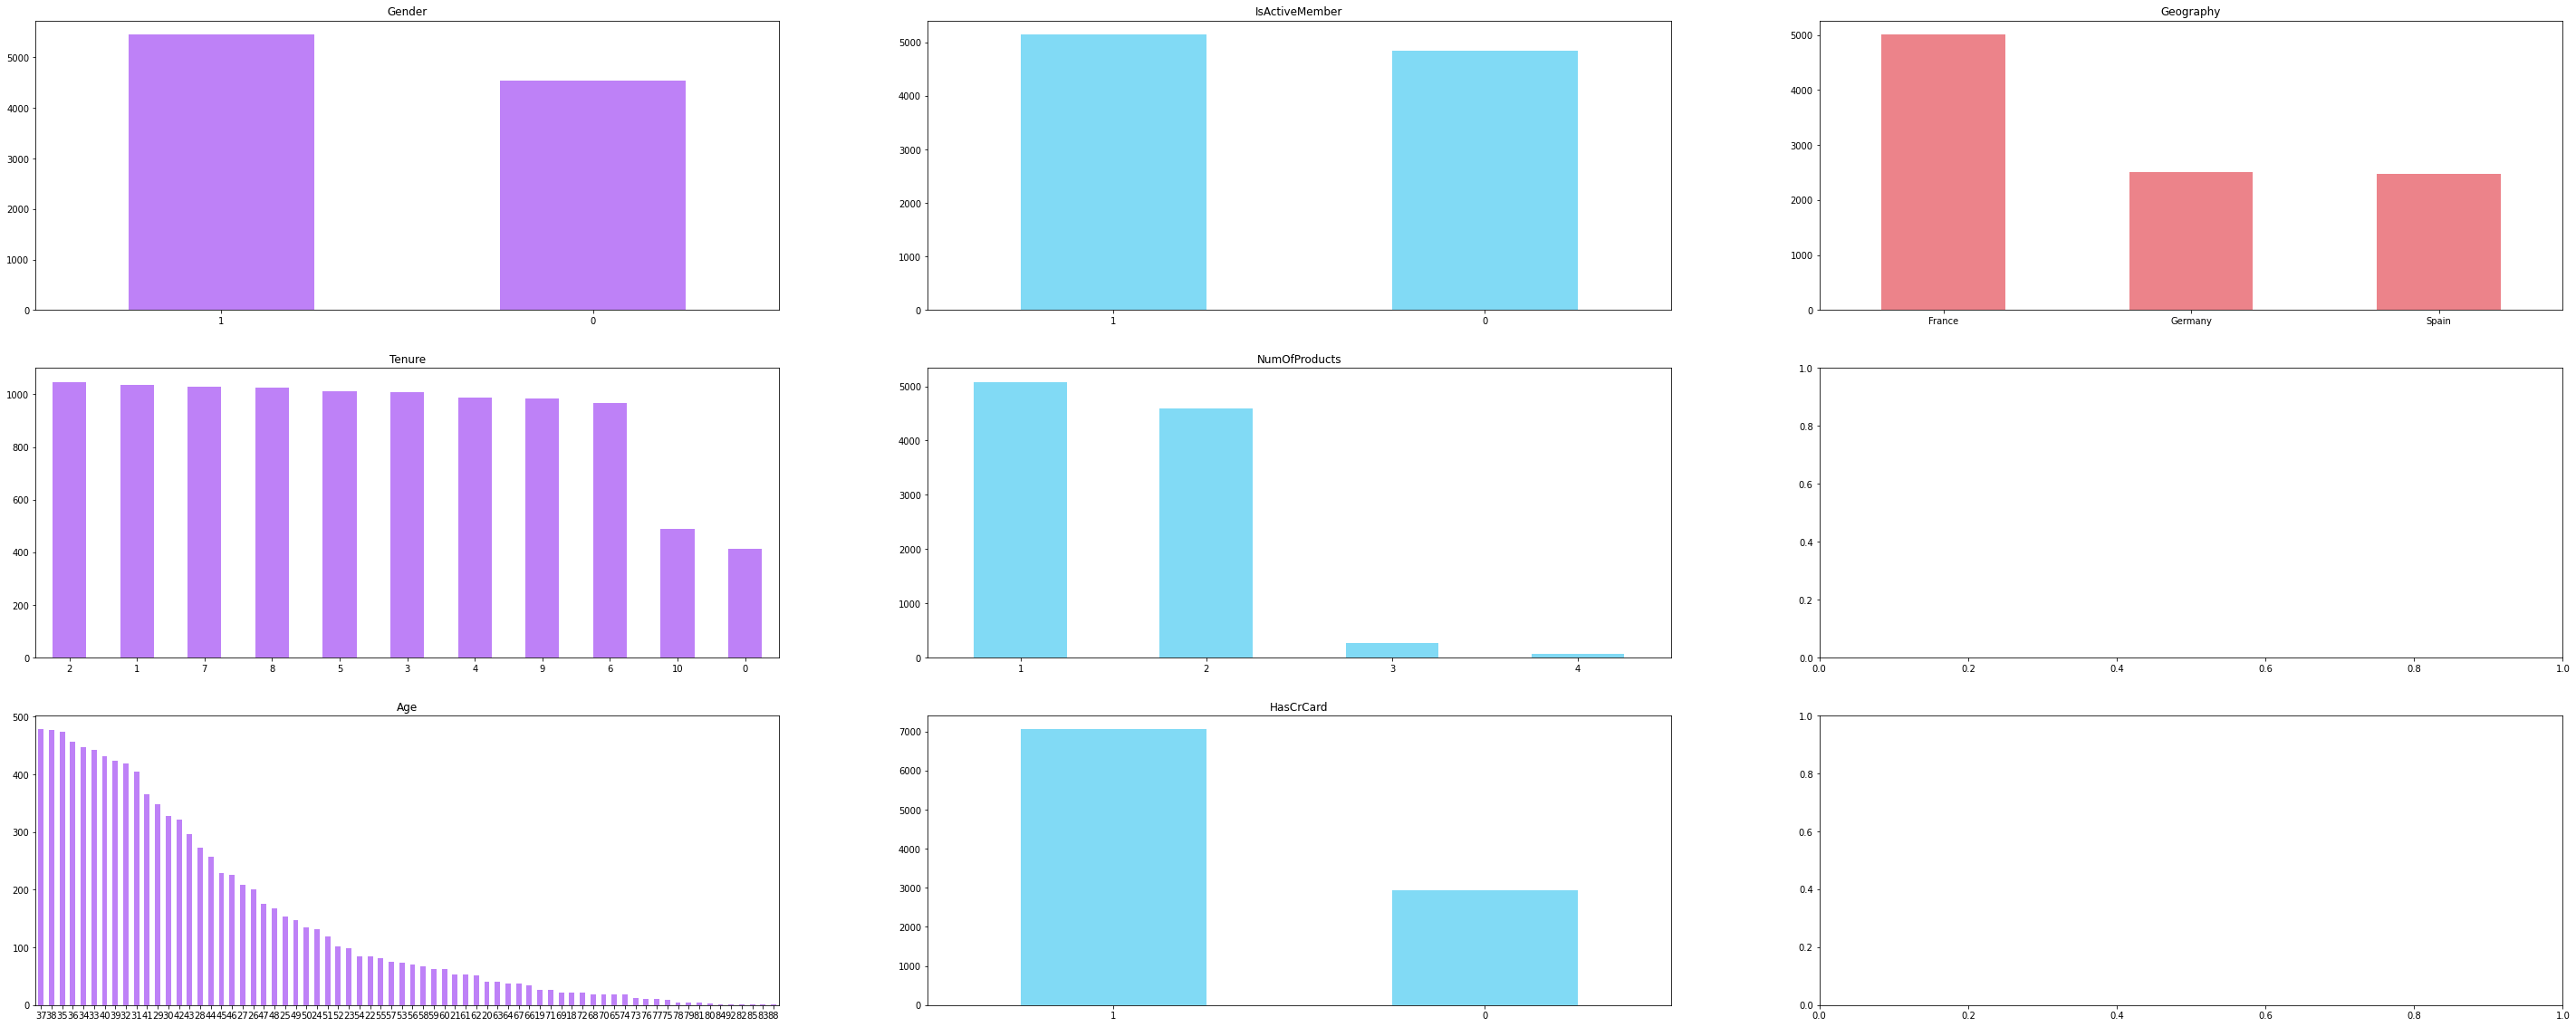

In [21]:
Columnas = ['Gender', 'Tenure', 'Age', 'IsActiveMember','NumOfProducts','HasCrCard', 'Geography']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (50,20))
for i, item in enumerate(Columnas):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#BE81F7' )
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#81DAF5')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')    
    ax.set_title(item)

Estos son los comentarios que tenemos despues de haber realizado el histograma:
Se pueden hacer algunas observaciones basadas en los histogramas de las variables numéricas:

1. La distribución por género muestra que el conjunto de datos presenta una proporción relativamente igual de clientes masculinos y femeninos. Presentando más cantidad en el genero masculino.

2. La mayoría de los clientes en el conjunto de datos son personas más jóvenes.

3. La mayoría de los clientes poseen tarjeta de credito con el banco.

4. La mayoría de los clientes tienen entre 0 y 10 años de antiguedad. 

5. La mayoría de clientes tienen al menos 2 productos con el banco 

--------------------------------------------------------------------------------

En base a lo que vimos inicialmente donde teníamos un gran porcentaje de clientes que el churn figuraba activo, entedemos que este puede ser un problema de clasificación desequilibrado, por lo cual realizaremos el analisis del abandono en base a nuestras variables categoricas: **Edad** , **País**,**Cantidad de productos** y **Posee tarjeta de credito del banco**

<ipython-input-22-2618cdb3187b>:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', fontsize = "medium")


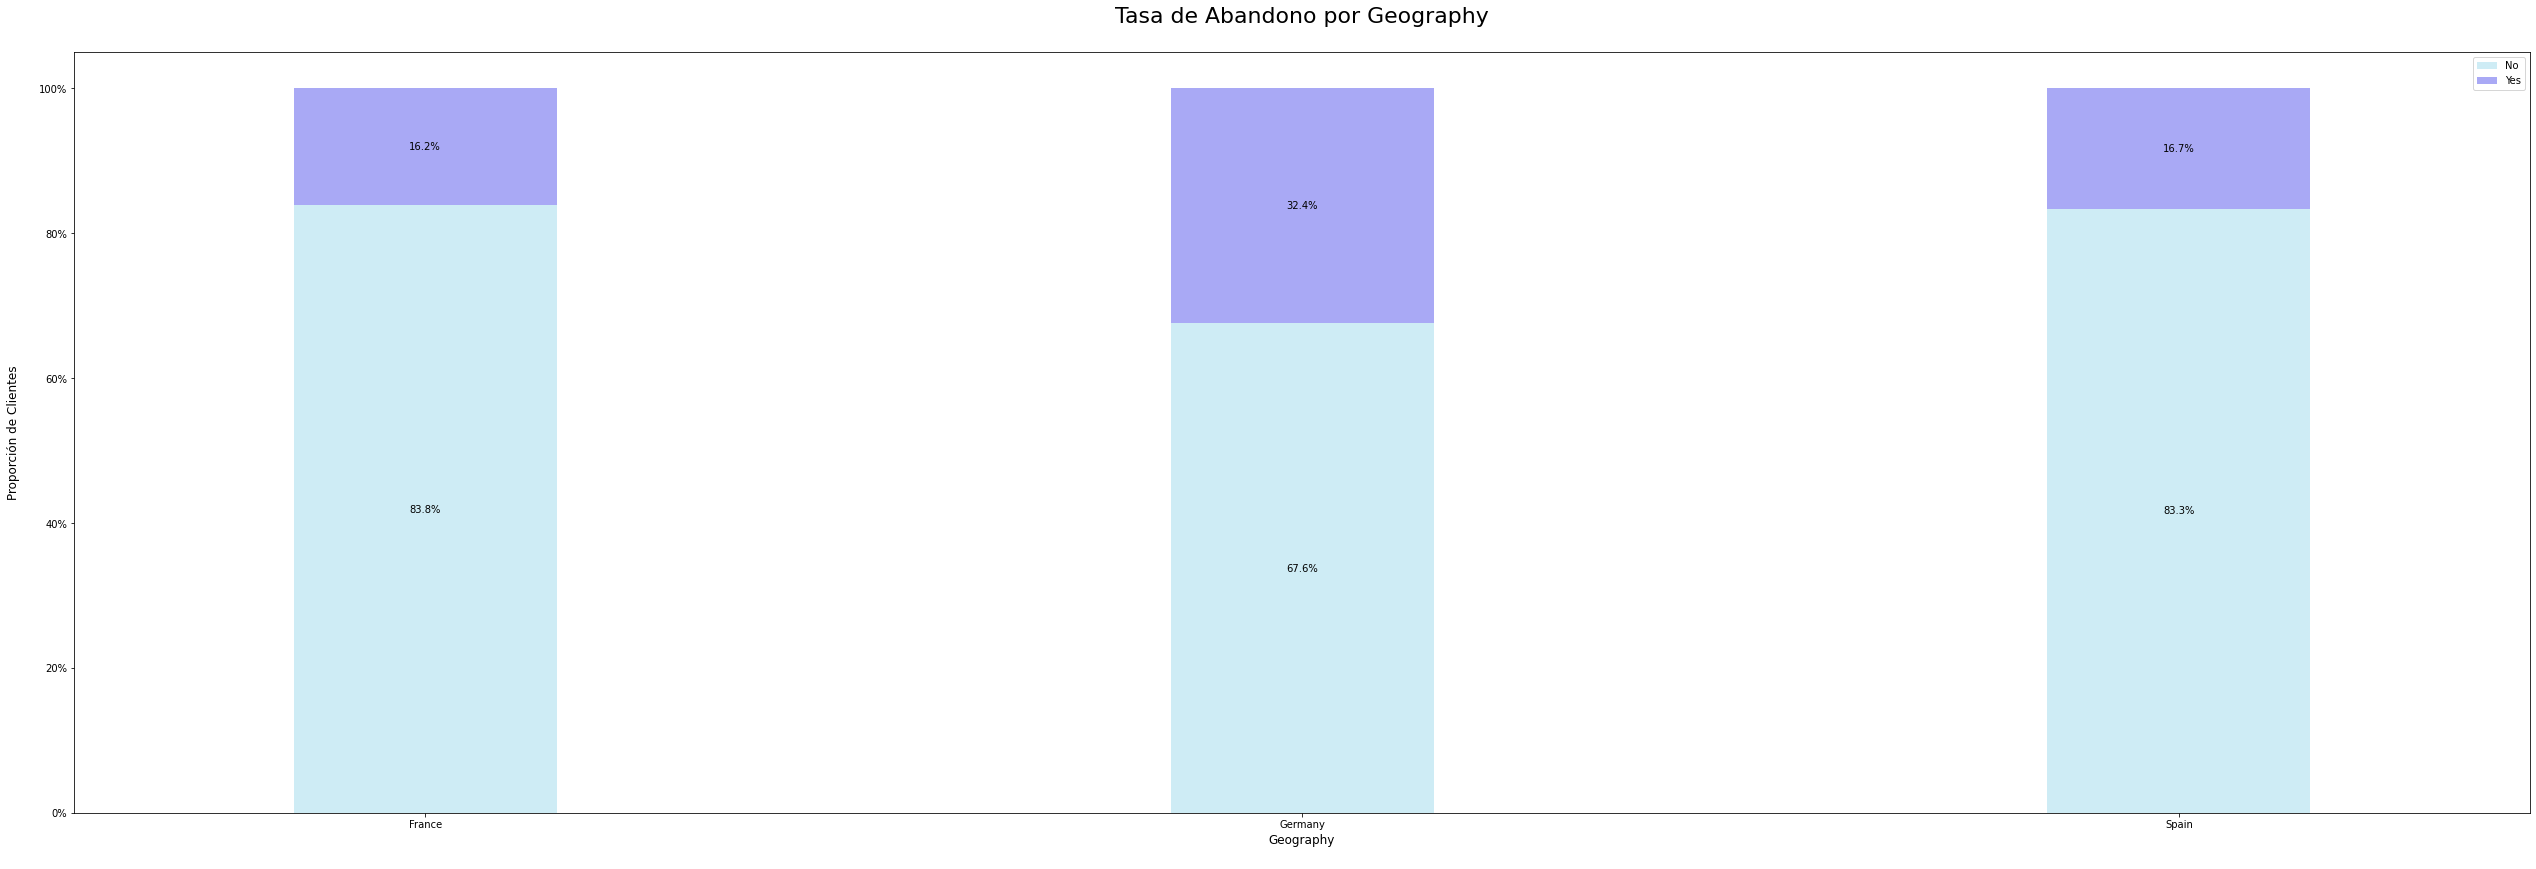

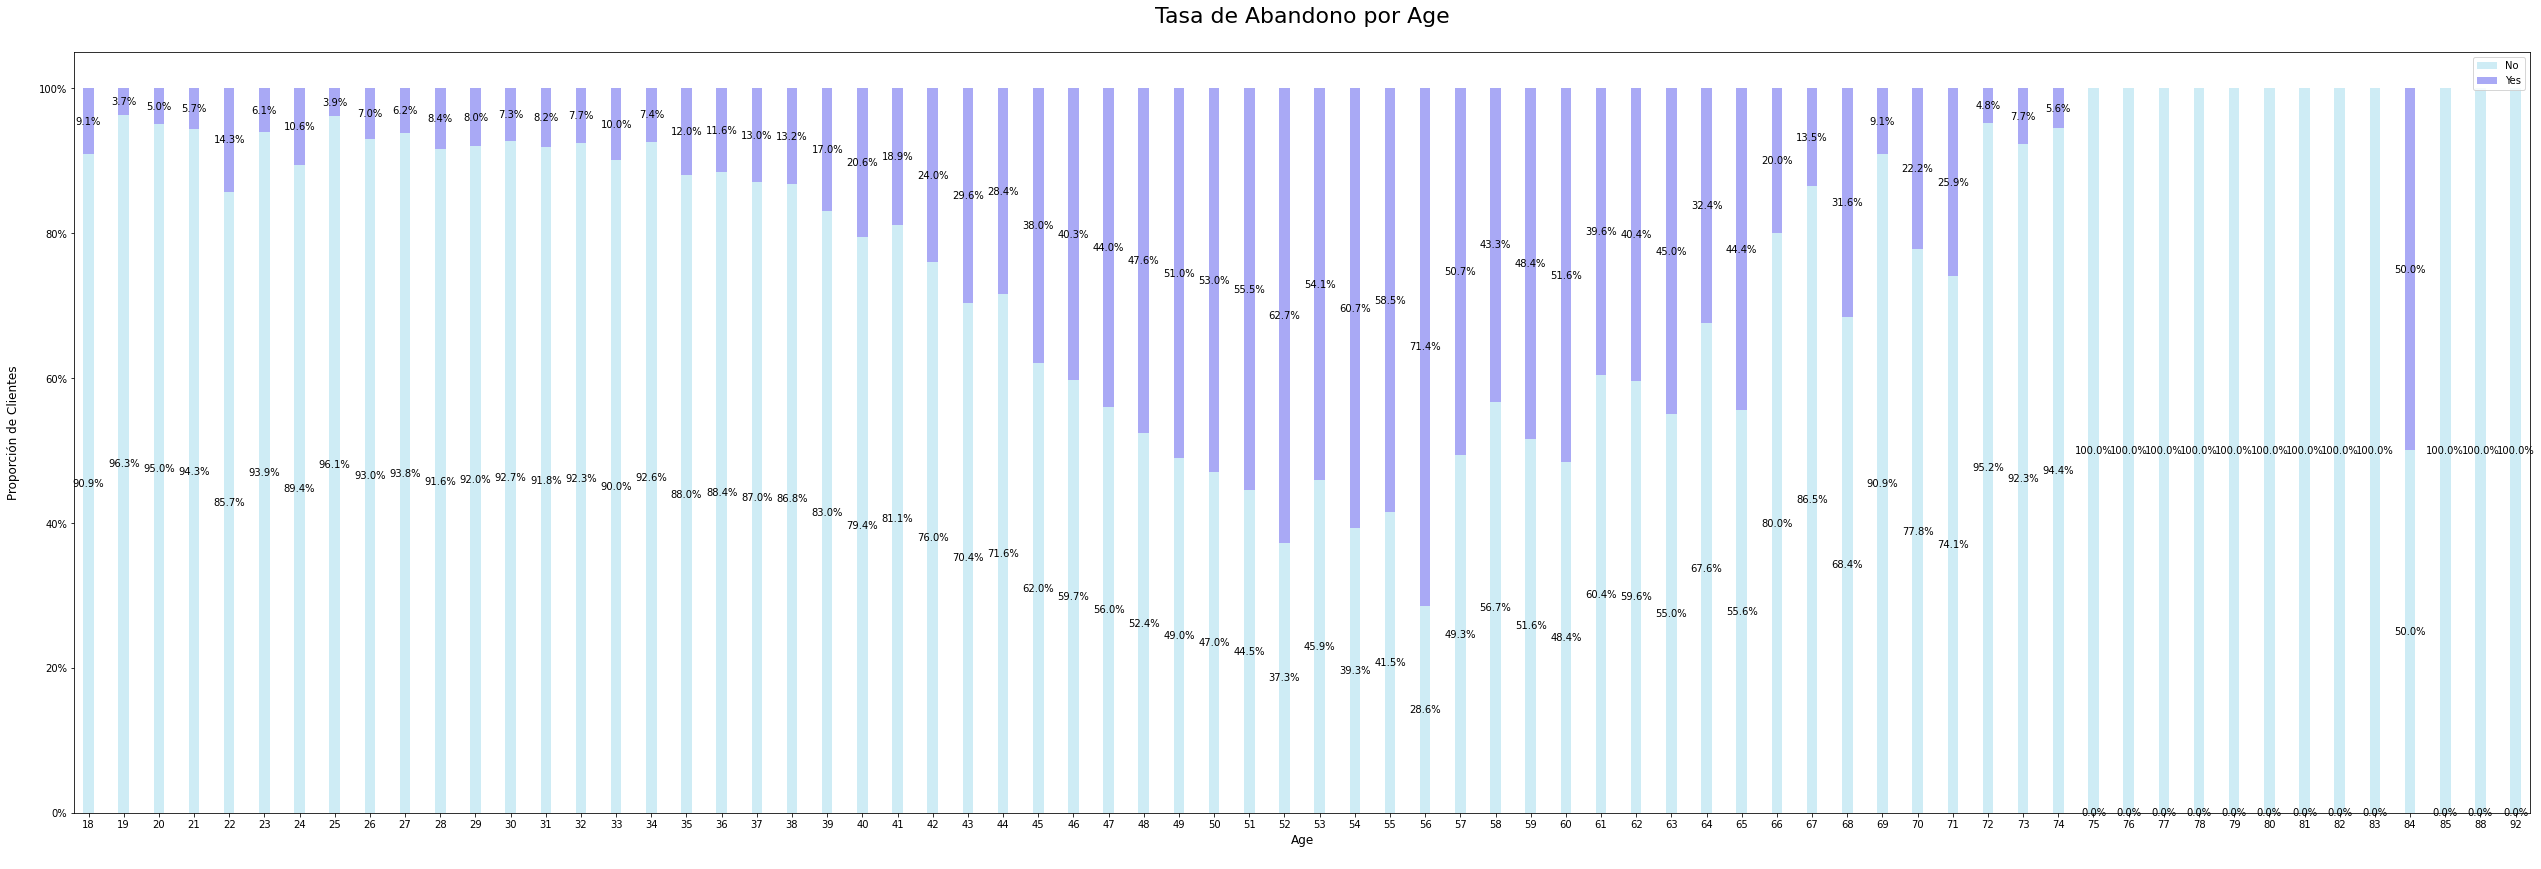

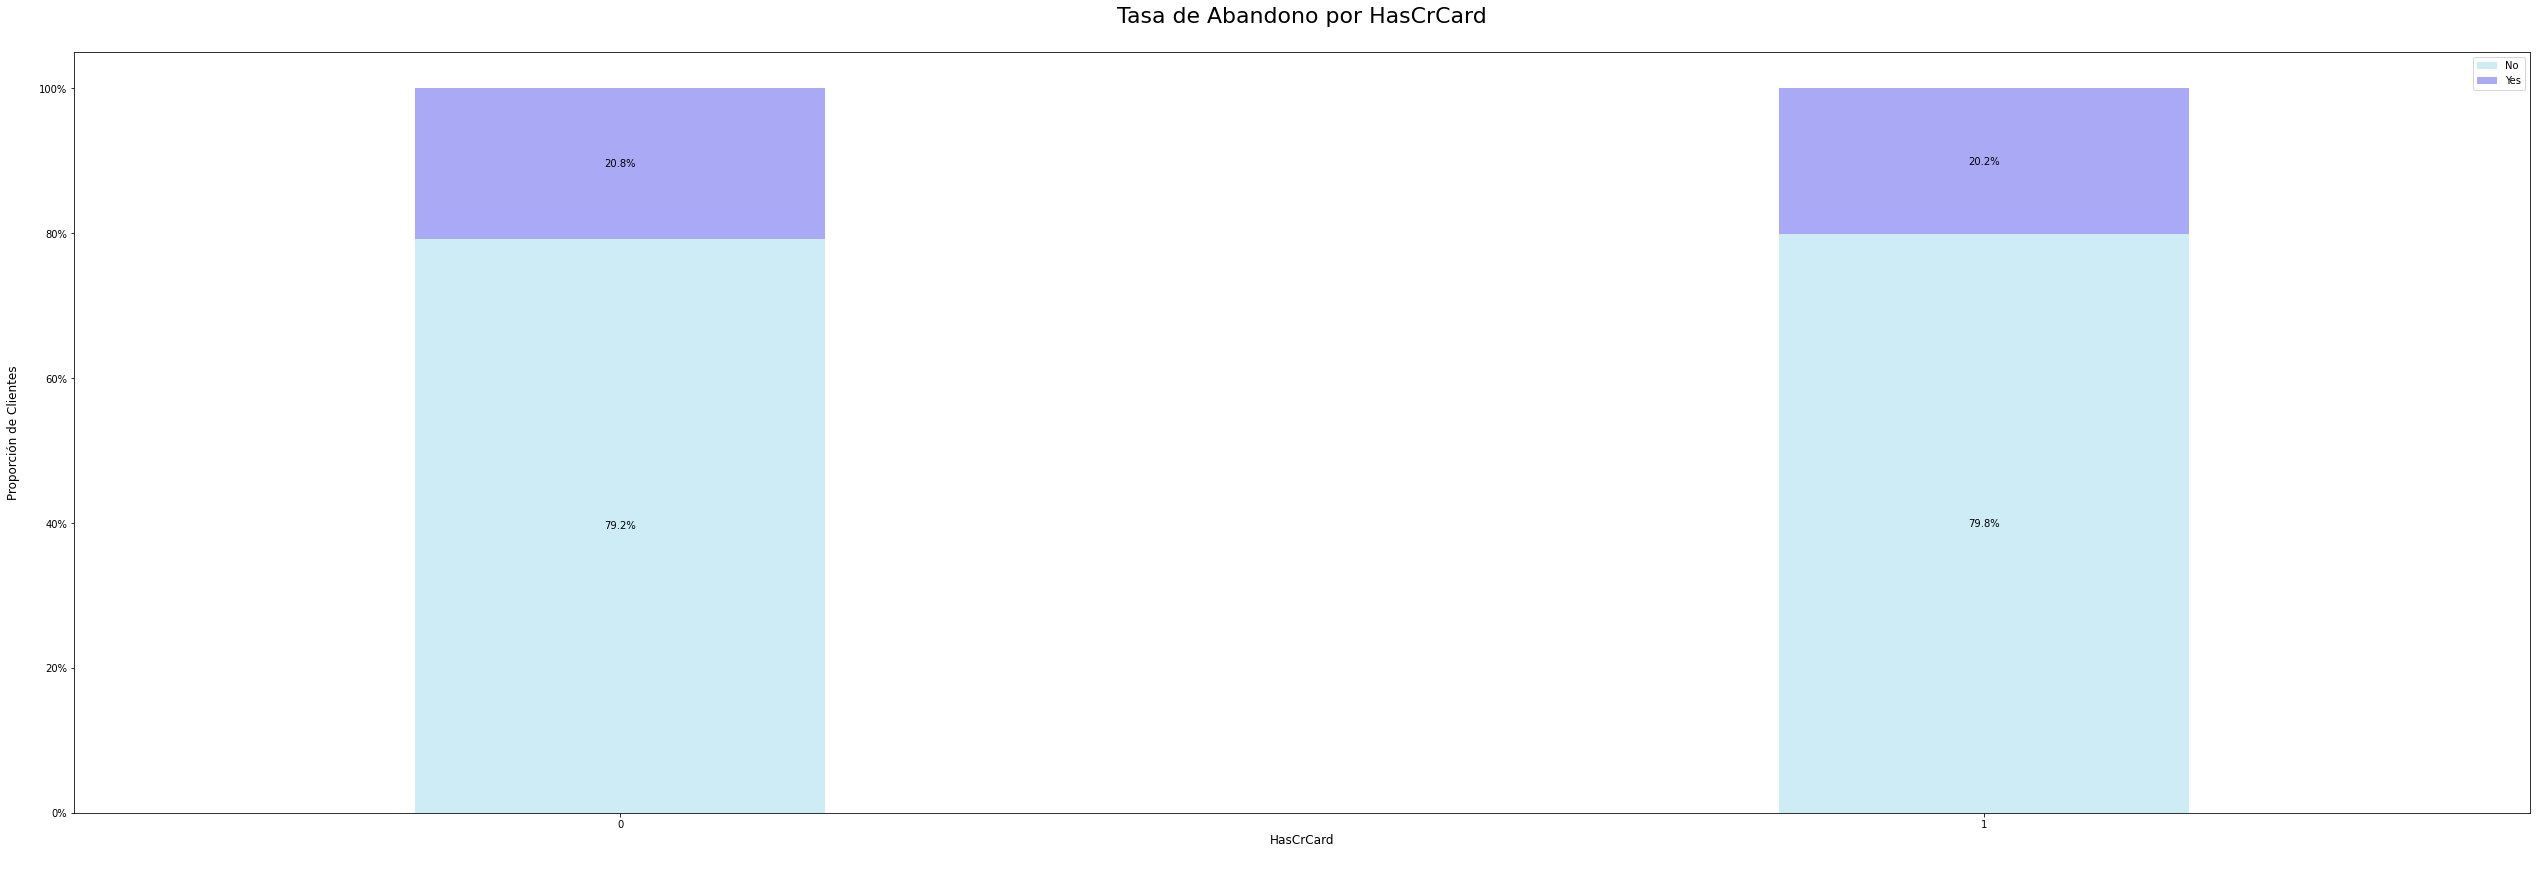

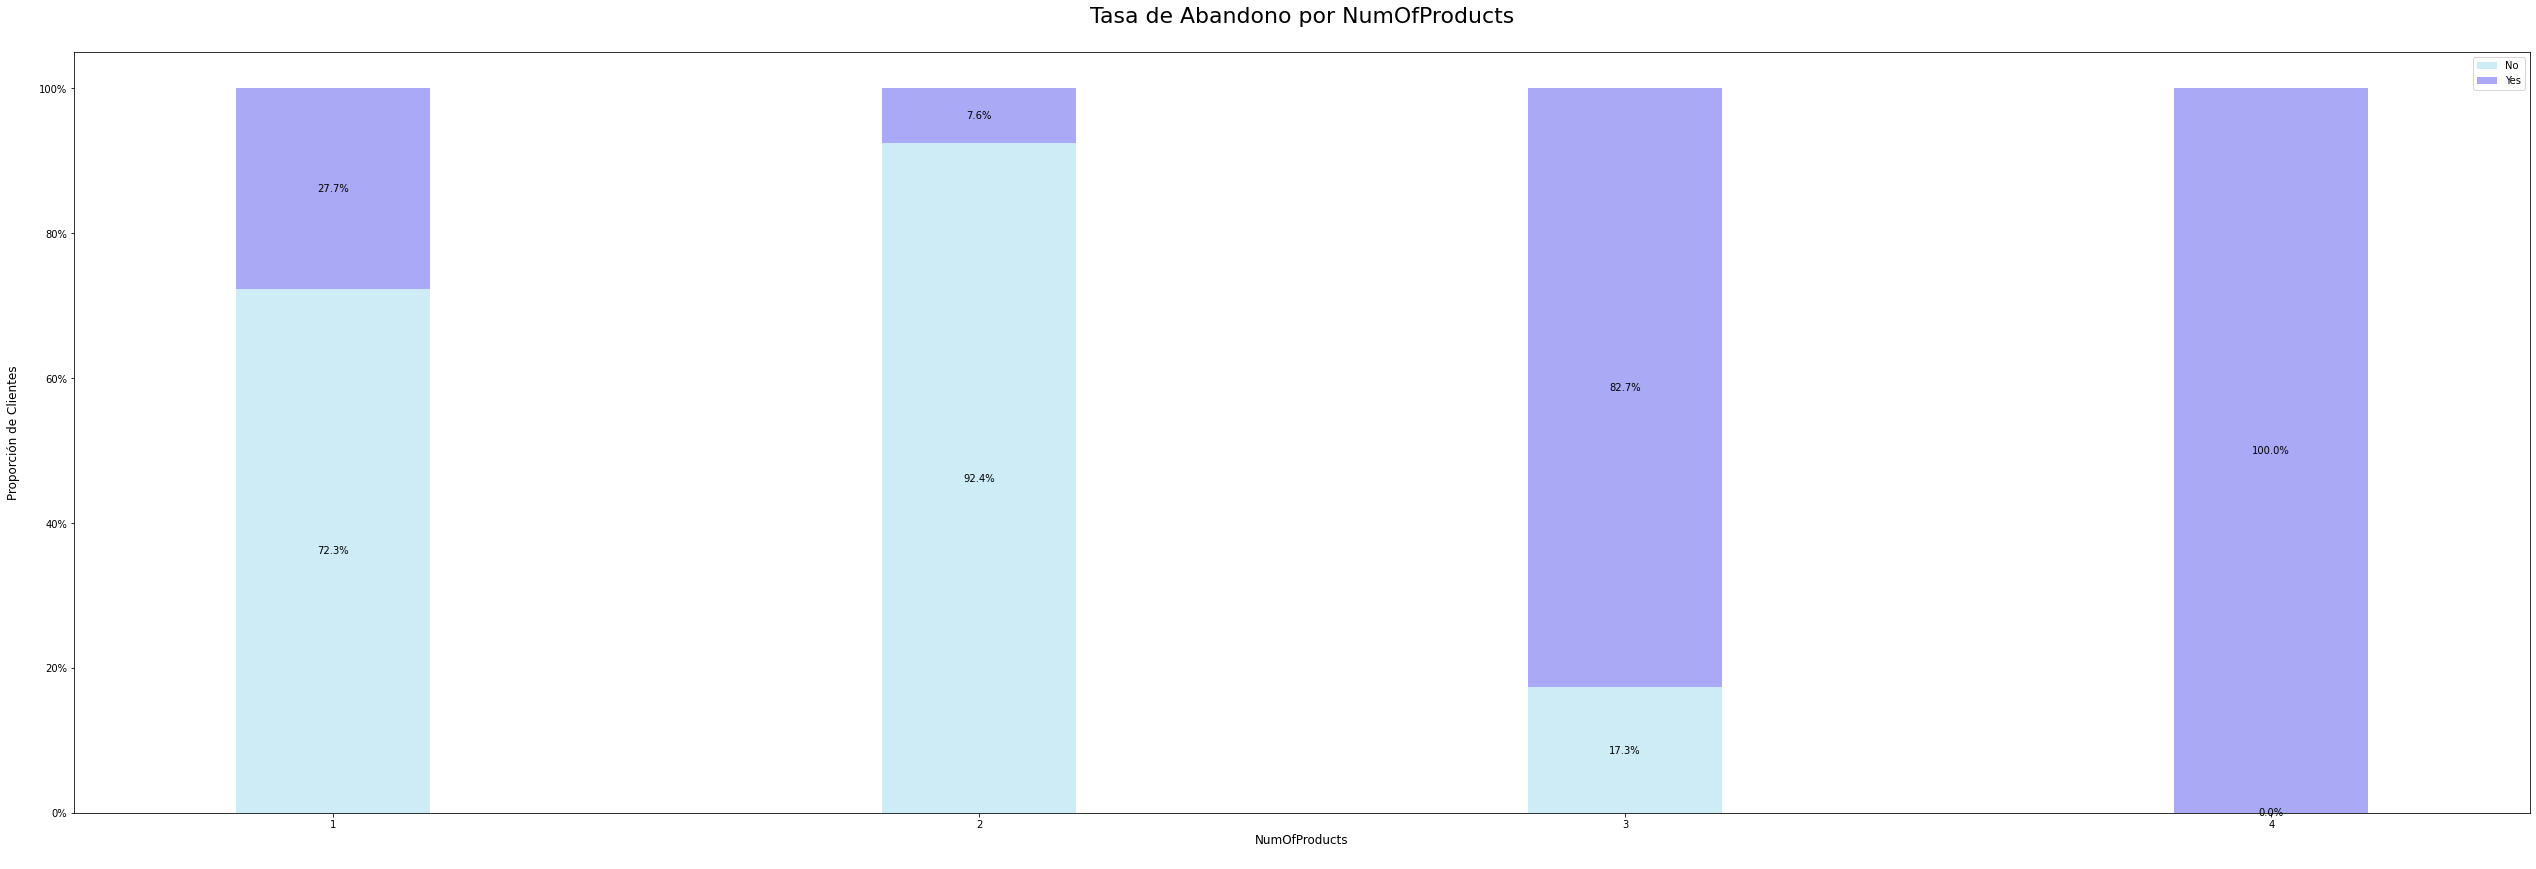

In [22]:
columnas_categoricas = ['Geography','Age','HasCrCard','NumOfProducts']
def graficosdistribucion(col):

  import matplotlib.ticker as mtick
  contract_churn = dataset.groupby([col,'Exited']).size().unstack()
  contract_churn.rename(columns=
  {0:'No', 1:'Yes'}, inplace=True)
  colors  = ['#CEECF5','#A9A9F5', '#D0A9F5' , '#BEF781']
  ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
  kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (44,14),
  color = colors)
  plt.ylabel('Proporción de Clientes\n',
  horizontalalignment="center",fontstyle = "normal", 
  fontsize = "large", fontfamily = "sans-serif")
  plt.xlabel(col+'\n',horizontalalignment="center",
  fontstyle = "normal", fontsize = "large", 
  fontfamily = "sans-serif")
  plt.title('Tasa de Abandono por ' +col+'\n',
  horizontalalignment="center", fontstyle = "normal", 
  fontsize = "22", fontfamily = "sans-serif")
  plt.legend(loc='top right', fontsize = "medium")
  plt.xticks(rotation=0, horizontalalignment="center")
  plt.yticks(rotation=0, horizontalalignment="right")
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())

  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      ax.text(x+width/2, 
              y+height/2, 
              '{:.1f}%'.format(height), 
              horizontalalignment='center', 
              verticalalignment='center')
      
  ax.autoscale(enable=False, axis='both', tight=False)


for i, item in enumerate(columnas_categoricas):
  print(8*"\n")
  graficosdistribucion(item)
  

De este grafico y basandonos en el anterior podemos ver los siguientes puntos:

1. Los clientes de los que más datos tenemos es de Francia, pero vemos que no tenemos tantos abandono de ese país. Sin embargo tenemos buena cantidad de datos en Alemania y se puede ver que es el país que más abandono tiene. 

2. Se puede ver que los clientes con edad superior a 40 y menor a 50 son los más propensos a abandonar.

3. Vemos que si bien el grafico anterior demostro que tenemos gran cantidad con clientes con Tarjeta de Credito, no suele afectar la cantidad de abandono. 

4. Se puede ver que cuando el cliente tiene 1 producto es más propenso a realizar abandono.

24/10/2022

#Trazamiento de correlaciones 


Obtenemos las variables numericas de nuestro dataset para poder realizar la correlación. Descartamos nuestra variable dependiente que es Exited (abandono)

In [23]:
columnas_numericas = []
for col in dataset.columns: 
    if dataset[col].dtypes != 'object' and col != 'Exited':
      columnas_numericas.append(col)


Text(0.5, 1.0, 'Correlación con Abandono \n')

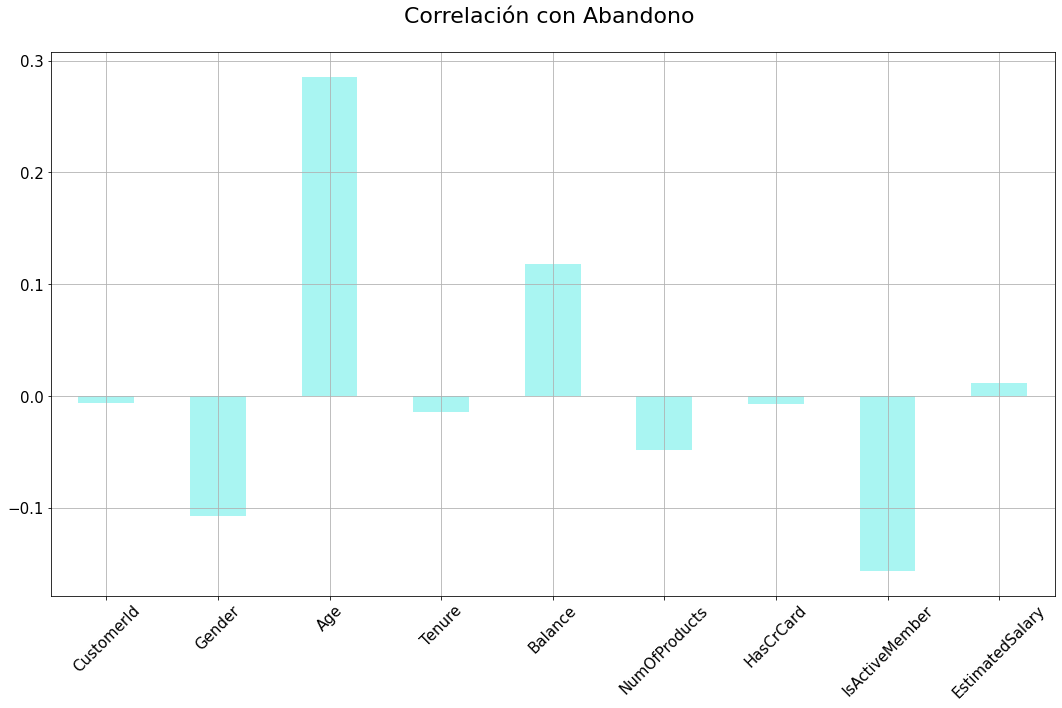

In [24]:
dataset2 = dataset[columnas_numericas]
correlations = dataset2.corrwith(dataset.Exited)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#A9F5F2',
        rot = 45, grid = True)
plt.title('Correlación con Abandono \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Matriz de correlacionamiento

<ipython-input-25-be9f8f4c0cdb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


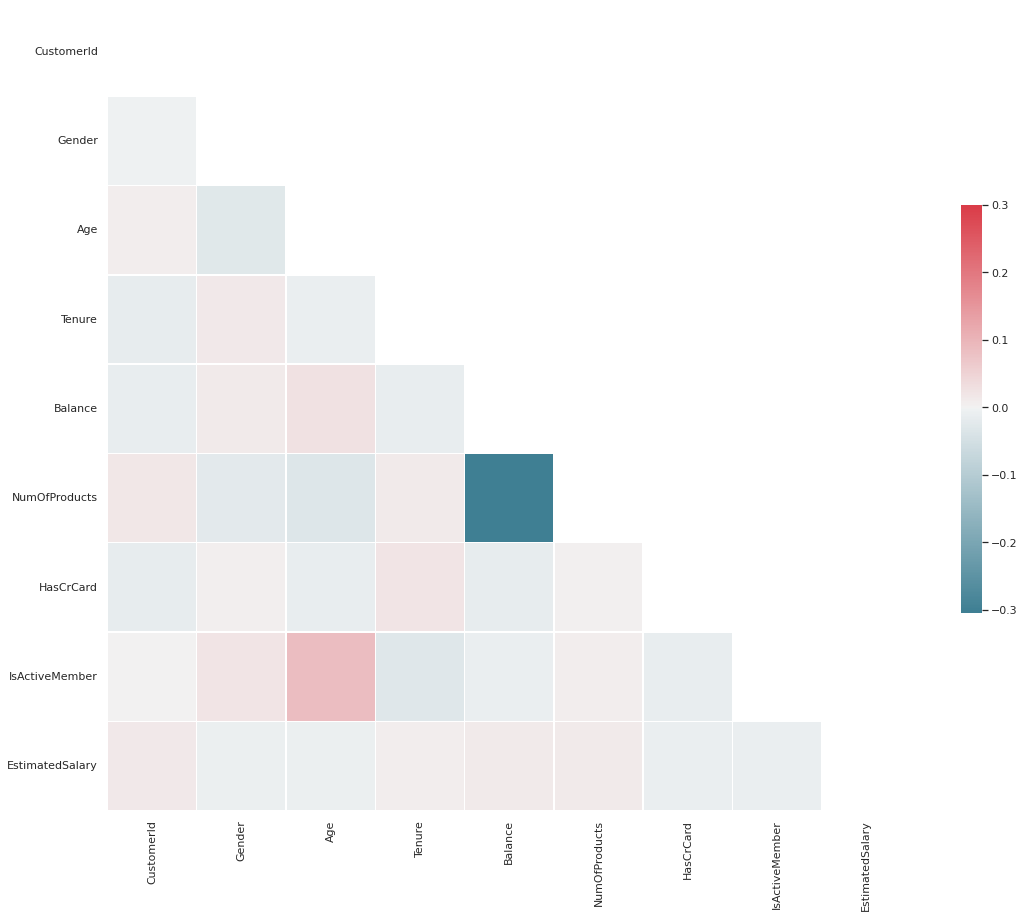

In [25]:

sn.set(style="white")
corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

Insights



1. El conjunto de datos no tiene valores de datos erróneos o faltantes.

2. La correlación positiva más fuerte con las características objetivo son con el balance y la edad, mientras que la correlación negativa es con el genero y si es socio activo el cliente. 

3. El conjunto de datos está desequilibrado con la mayoría de los clientes activos.

4. La mayoría de los clientes en el conjunto de datos tienen entre 30 y 50 años.

5. Hay muchos clientes antiguos en en el banco, con más de 3 años de antiguedad.

6. La mayoría de los clientes parecen tener al menos un producto contratado con el banco. 

7. Los clientes que tienen al menos un producto contratado son más propenso a abandonar el banco.

#Covarianza de las variables:

In [26]:
cov_mat=dataset.cov()
cov_mat

,CustomerId,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,5.174815e+09,-94.604682,7164.938021,-3096.345023,-5.574297e+07,710.137218,-459.904002,59.861288,6.317611e+07,-181.026889
Gender,-9.460468e+01,0.247936,-0.143841,0.021217,3.755257e+02,-0.006331,0.001309,0.005610,-2.323075e+02,-0.021361
Age,7.164938e+03,-0.143841,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205250
Tenure,-3.096345e+03,0.021217,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.016309
Balance,-5.574297e+07,375.525656,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2978.931708
NumOfProducts,7.101372e+02,-0.006331,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011203
HasCrCard,-4.599040e+02,0.001309,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001310
IsActiveMember,5.986129e+01,0.005610,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031429
EstimatedSalary,6.317611e+07,-232.307503,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,280.204670
Exited,-1.810269e+02,-0.021361,1.205250,-0.016309,2.978932e+03,-0.011203,-0.001310,-0.031429,2.802047e+02,0.162223


In [27]:
cov_mat.var()

CustomerId         2.677804e+18
Gender             2.263323e+04
Age                4.081748e+07
Tenure             1.616658e+06
Balance            1.517312e+18
NumOfProducts      1.254408e+07
HasCrCard          3.637156e+04
IsActiveMember     1.959488e+04
EstimatedSalary    1.086454e+18
Exited             8.930059e+05
dtype: float64

In [28]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=01a4e0a8413a9a44d2e600edce56ce9aef80d881c3f53b94781d0dacc85cb8ed
  Stored in directory: /root/.cache/pip/wheels/fe/60/a8/447c66eae887b085b3e112358a5fa837104b6cd0d9de41ca71
Successfully built fitter


In [29]:
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns


# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

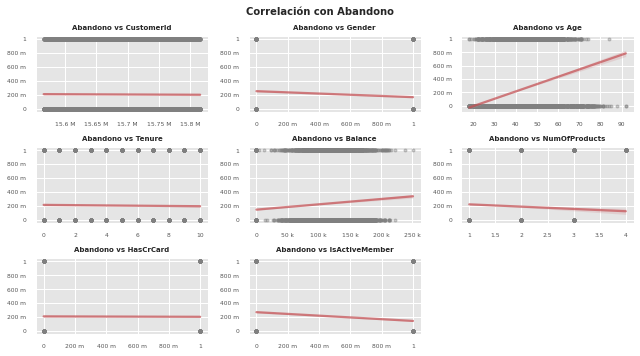

In [30]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Exited','CustomerId')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = dataset[colum],
        y           = dataset['Exited'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Abandono vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Abandono', fontsize = 10, fontweight = "bold");

In [31]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dataset.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
54,NumOfProducts,Balance,-0.304180,0.304180
45,Balance,NumOfProducts,-0.304180,0.304180
29,Age,Exited,0.285323,0.285323
92,Exited,Age,0.285323,0.285323
97,Exited,IsActiveMember,-0.156128,0.156128
79,IsActiveMember,Exited,-0.156128,0.156128
49,Balance,Exited,0.118533,0.118533
94,Exited,Balance,0.118533,0.118533
91,Exited,Gender,-0.106512,0.106512
19,Gender,Exited,-0.106512,0.106512


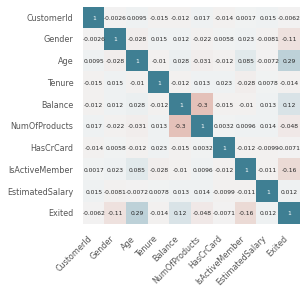

In [32]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [33]:
# Variables cualitativas (tipo object)
# ==============================================================================
dataset.select_dtypes(include=['object']).describe()

,Surname,Geography
count,10000,10000
unique,2932,3
top,Smith,France
freq,32,5014


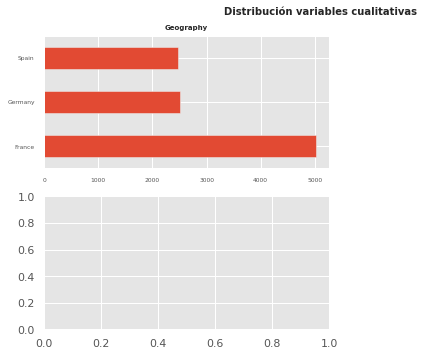

In [34]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('Surname')

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [1, 3]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Hicimos la prueba de jarque_bera para entender el estado de nuestro dataset, los resultados fueron:
El estadístico de prueba es 5165.5598 y el valor p correspondiente es 0.0 . Dado que este valor p es menor que .05, rechazamos la hipótesis nula. Por lo tanto, tenemos evidencia suficiente para decir que estos datos tienen asimetría y curtosis que son significativamente diferentes de una distribución normal.

In [35]:
import numpy as np
import scipy.stats as estadísticas

estadísticas.stats.jarque_bera(cov_mat)



Jarque_beraResult(statistic=5165.559879138838, pvalue=0.0)

#Escala y Estandarización del modelo para mejor los datos del dataset

Como vemos que el modelo está bastante desiquilibrado, y las correlaciones y varianzas no ayudan mucho para poder hacer un modelo, decidimos realizar la estandarización de valores.

In [36]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
df = pd.DataFrame(dataset, columns=['Age','Tenure','Exited','HasCrCard','NumOfProducts'])
# Conversion de los datos a numpy array
valores = df.values

# Construcion de escalador
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

# Escalamiento de los valores
normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=df.index,
                              columns=df.columns)

df_normalizados

,Age,Tenure,Exited,HasCrCard,NumOfProducts
4556,0.000000,0.1,0.0,1.0,0.000000
746,0.000000,0.2,0.0,0.0,0.000000
3686,0.000000,0.2,0.0,1.0,0.333333
1678,0.000000,0.4,0.0,1.0,0.000000
2136,0.000000,0.4,0.0,1.0,0.000000
...,...,...,...,...,...
5490,0.810811,0.2,0.0,0.0,0.333333
9736,0.810811,0.2,0.0,0.0,0.000000
5068,0.824324,0.5,0.0,1.0,0.000000
3994,0.837838,0.8,0.0,0.0,0.333333


#Evaluación de algoritmos

##Crear un conjunto de datos de validación

Necesitamos verificar que el modelo creado es bueno. Vamos a dividir el conjunto de datos cargados en dos:

In [38]:
#Seperamos en X e y
X = df_normalizados.drop("Exited", axis=1) #Elimino de mi dataset la variable a predecir
y = df_normalizados.Exited #Defino el Target

##Construir modelos

No sabemos cual algoritmo funcionará o cuál configuración utilizar. Vamos a probar 5 algoritmos distintos:

###Arboles de Decision

In [39]:
X

,Age,Tenure,HasCrCard,NumOfProducts
4556,0.000000,0.1,1.0,0.000000
746,0.000000,0.2,0.0,0.000000
3686,0.000000,0.2,1.0,0.333333
1678,0.000000,0.4,1.0,0.000000
2136,0.000000,0.4,1.0,0.000000
...,...,...,...,...
5490,0.810811,0.2,0.0,0.333333
9736,0.810811,0.2,0.0,0.000000
5068,0.824324,0.5,1.0,0.000000
3994,0.837838,0.8,0.0,0.333333


In [40]:
y

4556    0.0
746     0.0
3686    0.0
1678    0.0
2136    0.0
       ... 
5490    0.0
9736    0.0
5068    0.0
3994    0.0
2458    0.0
Name: Exited, Length: 10000, dtype: float64

In [41]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42) 

In [42]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [43]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [45]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8202857142857143
% de aciertos sobre el set de evaluación: 0.8183333333333334


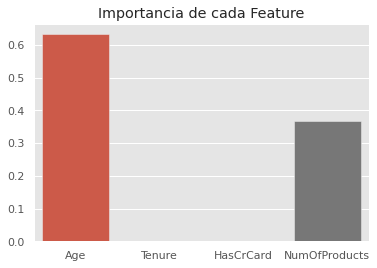

In [46]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Conclusión

Como resumen general del Workshop, podemos observar que para la clasificación del modelo en base a la variable target: Exited(Abandono), los features más importantes son: Age, seguido de NumOfProducts, dejando sin importancia a las variables Tenure y HasCrCard

Se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, en lo que respecta al % de aciertos del modelo.

###SVM

In [47]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [49]:
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

In [50]:
#Predicciones!
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [51]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7981428571428572
% de aciertos sobre el set de evaluación: 0.792


###Regresión Lineal

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.817117
Tenure,-0.016721
HasCrCard,-0.002923
NumOfProducts,-0.068543


In [55]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5691,0.0,0.270656
5187,1.0,0.101158
405,0.0,0.175631
6107,0.0,0.148429
9403,0.0,0.180647
...,...,...
9860,0.0,0.084858
7902,0.0,0.177790
8949,0.0,0.261532
1326,0.0,0.184900


###Hypertuning

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [59]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [100, 200, 500],
    'max_features': [2,3]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [60]:
#Entrenamos el modelo
grid_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [62]:
#Predicción de casos nuevos
grid_random_forest.predict(x_train)
grid_random_forest.predict(x_test)

array([0.32202381, 0.9208246 , 0.16305185, ..., 0.08929069, 0.082     ,
       0.00814551])

###K-Means


In [63]:
import plotly.express as px

In [64]:
df_normalizados

,Age,Tenure,Exited,HasCrCard,NumOfProducts
4556,0.000000,0.1,0.0,1.0,0.000000
746,0.000000,0.2,0.0,0.0,0.000000
3686,0.000000,0.2,0.0,1.0,0.333333
1678,0.000000,0.4,0.0,1.0,0.000000
2136,0.000000,0.4,0.0,1.0,0.000000
...,...,...,...,...,...
5490,0.810811,0.2,0.0,0.0,0.333333
9736,0.810811,0.2,0.0,0.0,0.000000
5068,0.824324,0.5,0.0,1.0,0.000000
3994,0.837838,0.8,0.0,0.0,0.333333


In [65]:
X = df_normalizados.iloc[:, [0, 3]].values

Nos quedamos con las variables 0,1 y 2 de conjunto de datos, las cuales corresponden a la edad de cliente, su antiguedad y si fue abandono o no


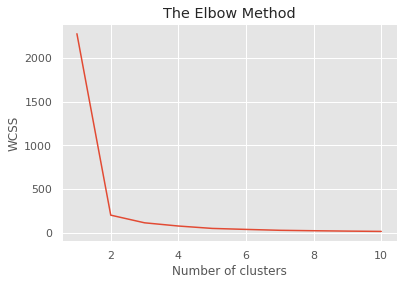

In [66]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11) y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 2, por lo que, para este caso práctico, el número óptimo de clusters será de 2.

In [67]:
# Creando el k-Means para los 2 grupos encontrados
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

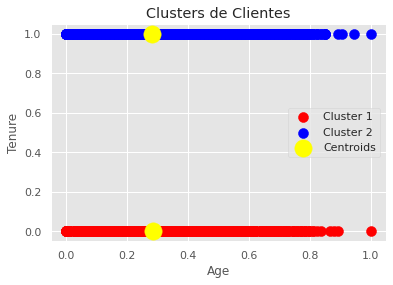

In [68]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters de Clientes')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.legend()
plt.show()

In [69]:
px.scatter(df_normalizados,
           x = 'Exited',
           y = 'Age')

In [70]:
# Lista de centroides
kmeans.cluster_centers_

array([[ 2.85298031e-01, -8.10462808e-15],
       [ 2.81653801e-01,  1.00000000e+00]])

# Evaluando modelos de Machine Learning

Para esta segunda ronda de Feature Engineering modificaremos las variables del árbol de desición, eliminando las que nos son relevantes y añadiendo otras dos para verificar su significancia.

Tambien plantearemos un nuevo modelo de regresión multivariada.

In [71]:
df = pd.DataFrame(dataset, columns=['Age','Exited','NumOfProducts','EstimatedSalary','IsActiveMember'])
# Conversion de los datos a numpy array
valores = df.values

# Construcion de escalador
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

# Escalamiento de los valores
normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=df.index,
                              columns=df.columns)

#Seperamos en X e y
X = df_normalizados.drop("Exited", axis=1) #Elimino de mi dataset la variable a predecir
y = df_normalizados.Exited #Defino el Target


## Re-estimación del arbol de desición

In [72]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42) 

tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8287142857142857
% de aciertos sobre el set de evaluación: 0.831


Conclusión

En una primera instacia habiamos descartado las variables Tenure y HasCrCard por no ser significativas. Para esta segunda revisión eliminamos esas variables e incluimos "IsActiveMember" y "EstimatedSalary".

Podemos observar que el feature Age continua siendo el más relevante, que el nuevo "IsActiveMember" tiene un relevancia importante, lo que lo situa en segundo lugar, manetemos "NumOfProducts y finalmente "EstimatedSalary" tampoco aporta al modelo.

En las metricas notamos una leve mejoria.

Se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, en lo que respecta al % de aciertos del modelo.


## Regresión multivariada

In [73]:
import statsmodels.formula.api as smf  

In [84]:
mod = smf.ols("y ~ Age + NumOfProducts + EstimatedSalary + IsActiveMember", data = df).fit()

In [89]:
(mod.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     327.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          5.74e-265
Time:                        00:07:24   Log-Likelihood:                -4479.8
No. Observations:               10000   AIC:                             8970.
Df Residuals:                    9995   BIC:                             9006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1388      0.019     -7.213      0.000      -0.176      -0.101
Age                 0.0115      0.000     31.738      0.000       0.011       0.012
NumOfProducts      -0.0257      0.007     -3.938      0.000      -0.038      -0.013
EstimatedSalary  8.903e-08   6.59e-08      1.351      0.177   -4.01e-08    2.18e-07
IsActiveMember     -0.1461      0.008    -19.197      0.000      -0.161      -0.131
==============================================================================
Omnibus:                     1607.779   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2524.806
Skew:                           1.226   Prob(JB):                         0.00
Kurtosis:                       3.210   Cond. No.                     5.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Este modelo tiene una baja capacidad de prediccion con un R2 de 11.6%, de igual manera, se obsera que la variable EstimatedSalary no es significativa para el modelo.